# Problem Statement:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

# Import Datast

In [2]:
fraud_check_data = pd.read_csv('Fraud_check.csv')

In [3]:
fraud_check_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Data Understanding

In [4]:
fraud_check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

###### No null values are present.

## Data Preparation

In [5]:
fraud_check_data = pd.read_csv('Fraud_check.csv')
fraud_check_data['taxable.income'] = 'Risky'
fraud_check_data.loc[fraud_check_data["Taxable.Income"]>30000,"taxable.income"]='Good'
fraud_check_data.drop(["Taxable.Income"],axis=1,inplace=True)
fraud_check_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable.income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [6]:
fraud_check_data['Marital.Status'] = LabelEncoder().fit_transform(fraud_check_data['Marital.Status']) #0 : Divorced, 1: Married, 2: Single
fraud_check_data['Urban']          = LabelEncoder().fit_transform(fraud_check_data['Urban'])          #1 : yes, 0: No
fraud_check_data['taxable.income'] = LabelEncoder().fit_transform(fraud_check_data['taxable.income']) #1 : Good, 0: Risky
fraud_check_data['Undergrad']      = LabelEncoder().fit_transform(fraud_check_data['Undergrad'])      #1 : yes, 0: No

In [7]:
fraud_check_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable.income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


# Model Building

In [8]:
X = fraud_check_data.drop(labels=['taxable.income'],axis=1)  
y = fraud_check_data[['taxable.income']]
X.shape,y.shape

((600, 5), (600, 1))

In [9]:
rf_model = RandomForestClassifier()

# Model Training

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [11]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

# Model Testing || Model Evaluation

### Training Data

In [12]:
y_pred_train = rf_model.predict(X_train)

In [13]:
print('The accuracy score for Training data is \n',accuracy_score(y_train,y_pred_train))
print('The classification report for Training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for Training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for Training data is 
 1.0
The classification report for Training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

The confusion matrix for Training data is 
 [[369   0]
 [  0 111]]


1.0


Text(0, 0.5, 'True positive rate')

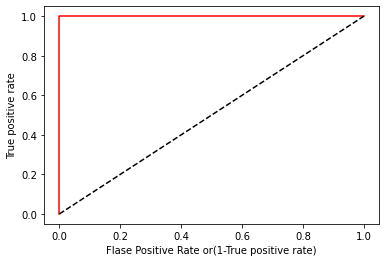

In [14]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [15]:
y_pred_test = rf_model.predict(X_test)

In [16]:
print('The accuracy score for Testing data is \n',accuracy_score(y_test,y_pred_test))
print('The classification report for Testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for Testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for Testing data is 
 0.775
The classification report for Testing data is 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.00      0.00      0.00        13

    accuracy                           0.78       120
   macro avg       0.44      0.43      0.44       120
weighted avg       0.78      0.78      0.78       120

The confusion matrix for Testing data is 
 [[93 14]
 [13  0]]


0.43457943925233644


Text(0, 0.5, 'True positive rate')

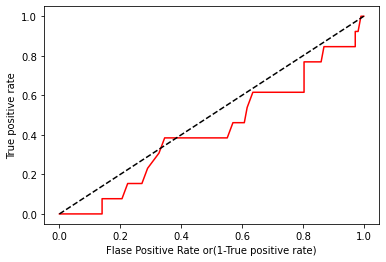

In [17]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

##### training_data accuracy is 100% while testing data accuracy is 79%.
### The model has overfitted. 

#### Let us use gridsearchcv to get best parameters.

In [18]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'criterion':['gini','entropy',"log_loss"],
                                     'max_depth':[2,3,4,5,6,7]},
                          cv = 5)
grid_search.fit(X,y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7]})

In [19]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 2}
0.7933333333333332


In [20]:
rf_model_1 = RandomForestClassifier(criterion='gini',max_depth=2)

In [21]:
rf_model_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

# Model Testing || Model Evaluation

### Training Data

In [22]:
y_pred_train = rf_model_1.predict(X_train)

In [23]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.76875
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

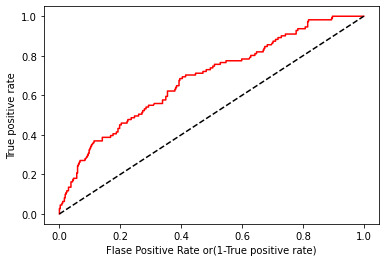

In [24]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_1.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [25]:
y_pred_test = rf_model_1.predict(X_test)

In [26]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8916666666666667
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for testing data is 
 [[107   0]
 [ 13   0]]


0.5


Text(0, 0.5, 'True positive rate')

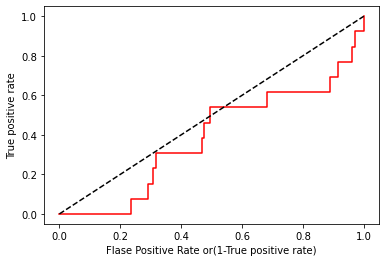

In [27]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_1.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# still model is overfitted.

## Let us take 250 DTs inside Random Forest

In [29]:
rf_model_2 = RandomForestClassifier(n_estimators=250,criterion='gini',max_depth=2)

In [30]:
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=250)

# Model Testing || Model Evaluation

### Training Data

In [31]:
y_pred_train = rf_model_2.predict(X_train)

In [32]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.76875
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

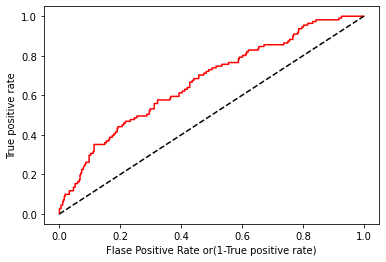

In [33]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_2.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_2 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [34]:
y_pred_test = rf_model_2.predict(X_test)

In [35]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8916666666666667
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for testing data is 
 [[107   0]
 [ 13   0]]


0.5


Text(0, 0.5, 'True positive rate')

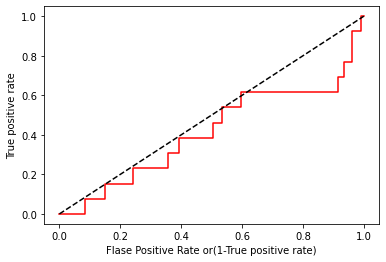

In [36]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_2.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_2 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

## Let us take 100 DTs inside Random Forest

In [37]:
rf_model_3 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=2)

In [38]:
rf_model_3.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

# Model Testing || Model Evaluation

### Training Data

In [39]:
y_pred_train = rf_model_3.predict(X_train)

In [40]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.76875
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

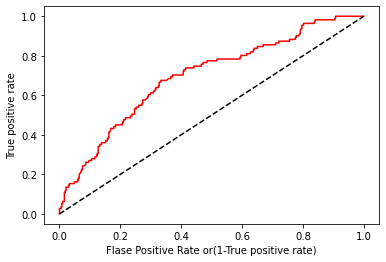

In [41]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_3.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_3 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [42]:
y_pred_test = rf_model_3.predict(X_test)

In [43]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8916666666666667
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for testing data is 
 [[107   0]
 [ 13   0]]


0.5


Text(0, 0.5, 'True positive rate')

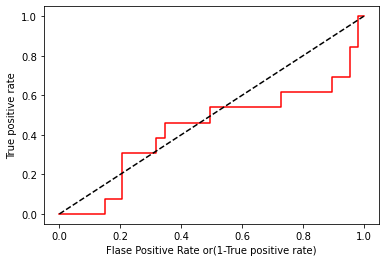

In [44]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_3.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_3 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

## Let us take 1000 DTs inside Random Forest

In [45]:
rf_model_4 = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=2)

In [46]:
rf_model_4.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000)

# Model Testing || Model Evaluation

### Training Data

In [47]:
y_pred_train = rf_model_4.predict(X_train)

In [48]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.76875
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

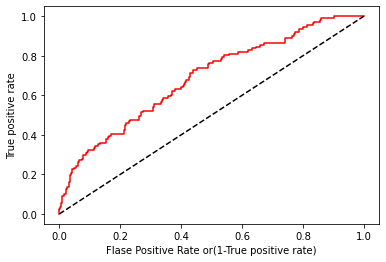

In [49]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_4.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_4 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [50]:
y_pred_test = rf_model_4.predict(X_test)

In [51]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8916666666666667
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for testing data is 
 [[107   0]
 [ 13   0]]


0.5


Text(0, 0.5, 'True positive rate')

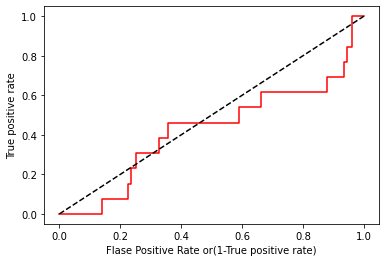

In [52]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_4.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_4 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

## Let us tweak some other parameters as well.

In [53]:
rf_model_5 = RandomForestClassifier(n_jobs=4,n_estimators=1000,criterion='gini',max_depth=2,oob_score=True)

In [54]:
rf_model_5.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, n_jobs=4, oob_score=True)

# Model Testing || Model Evaluation

### Training Data

In [55]:
y_pred_train = rf_model_5.predict(X_train)

In [56]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.76875
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       0.00      0.00      0.00       111

    accuracy                           0.77       480
   macro avg       0.38      0.50      0.43       480
weighted avg       0.59      0.77      0.67       480

The confusion matrix for training data is 
 [[369   0]
 [111   0]]


0.5


Text(0, 0.5, 'True positive rate')

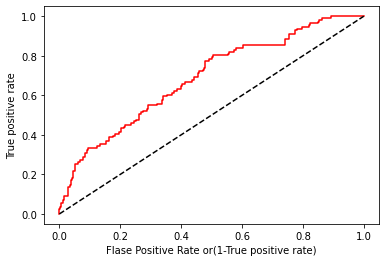

In [57]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_5.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_5 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [58]:
y_pred_test = rf_model_5.predict(X_test)

In [59]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8916666666666667
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       107
           1       0.00      0.00      0.00        13

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120

The confusion matrix for testing data is 
 [[107   0]
 [ 13   0]]


0.5


Text(0, 0.5, 'True positive rate')

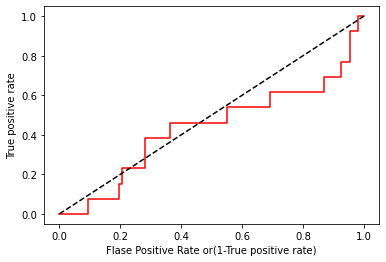

In [60]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_5.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_5 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

## Let us tweak some other parameters as well.

In [61]:
rf_model_6 = RandomForestClassifier(n_jobs=4,n_estimators=150,criterion='entropy',oob_score=True)

In [62]:
rf_model_6.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, n_jobs=4,
                       oob_score=True)

# Model Testing || Model Evaluation

### Training Data

In [63]:
y_pred_train = rf_model_6.predict(X_train)

In [64]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  1.0
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

The confusion matrix for training data is 
 [[369   0]
 [  0 111]]


1.0


Text(0, 0.5, 'True positive rate')

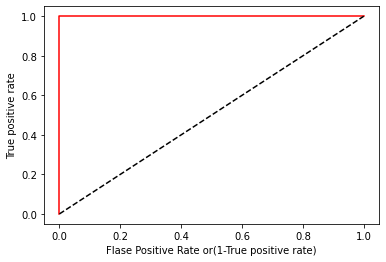

In [65]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_6.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_6 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [66]:
y_pred_test = rf_model_6.predict(X_test)

In [67]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7916666666666666
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       107
           1       0.00      0.00      0.00        13

    accuracy                           0.79       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.78      0.79      0.79       120

The confusion matrix for testing data is 
 [[95 12]
 [13  0]]


0.4439252336448598


Text(0, 0.5, 'True positive rate')

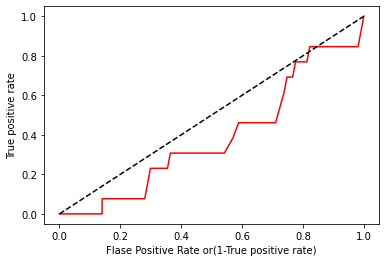

In [68]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_6.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_6 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [69]:
rf_model_7 = RandomForestClassifier(n_jobs=4,n_estimators=250,criterion='entropy',oob_score=True)

In [70]:
rf_model_7.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250, n_jobs=4,
                       oob_score=True)

# Model Testing || Model Evaluation

### Training Data

In [71]:
y_pred_train = rf_model_7.predict(X_train)

In [72]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  1.0
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

The confusion matrix for training data is 
 [[369   0]
 [  0 111]]


1.0


Text(0, 0.5, 'True positive rate')

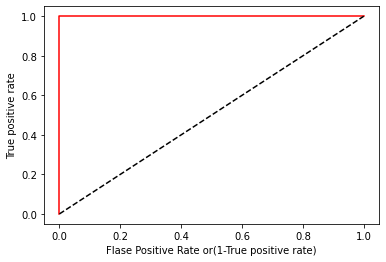

In [73]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_7.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_7 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [74]:
y_pred_test = rf_model_7.predict(X_test)

In [75]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7916666666666666
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       107
           1       0.00      0.00      0.00        13

    accuracy                           0.79       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.78      0.79      0.79       120

The confusion matrix for testing data is 
 [[95 12]
 [13  0]]


0.4439252336448598


Text(0, 0.5, 'True positive rate')

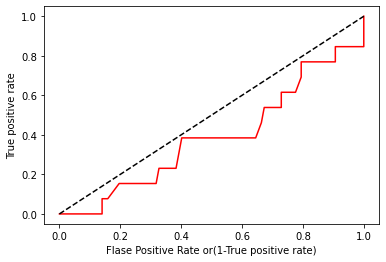

In [76]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_7.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_6 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [77]:
rf_model_8 = RandomForestClassifier(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")

In [78]:
rf_model_8.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [79]:
y_pred_train = rf_model_8.predict(X_train)

In [80]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.98125
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       369
           1       1.00      0.92      0.96       111

    accuracy                           0.98       480
   macro avg       0.99      0.96      0.97       480
weighted avg       0.98      0.98      0.98       480

The confusion matrix for training data is 
 [[369   0]
 [  9 102]]


0.9594594594594594


Text(0, 0.5, 'True positive rate')

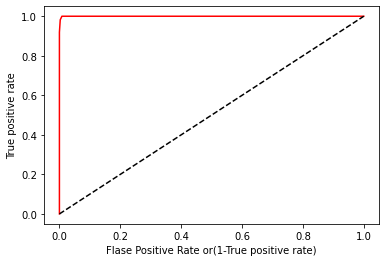

In [81]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_8.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_8 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [82]:
y_pred_test = rf_model_8.predict(X_test)

In [83]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7583333333333333
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       107
           1       0.00      0.00      0.00        13

    accuracy                           0.76       120
   macro avg       0.44      0.43      0.43       120
weighted avg       0.78      0.76      0.77       120

The confusion matrix for testing data is 
 [[91 16]
 [13  0]]


0.4252336448598131


Text(0, 0.5, 'True positive rate')

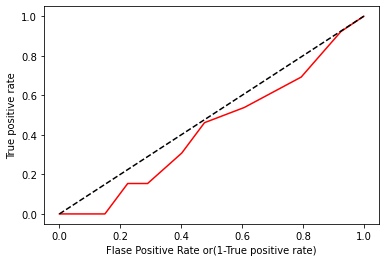

In [84]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_8.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_8 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [85]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'n_jobs':[4],'n_estimators':[150],'criterion':['gini','entropy'],'oob_score':[True,False]},
                          cv = 5)        
grid_search.fit(X,y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [150], 'n_jobs': [4],
                         'oob_score': [True, False]})

In [86]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': 4, 'oob_score': True}
0.7466666666666667


### rf_model_6

In [87]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'n_jobs':[3,4],'n_estimators':[15,150],'criterion':['gini','entropy'],'oob_score':[True,False]},
                          cv = 5)        
grid_search.fit(X,y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [15, 150], 'n_jobs': [3, 4],
                         'oob_score': [True, False]})

In [88]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'n_estimators': 15, 'n_jobs': 4, 'oob_score': True}
0.755


In [89]:
rf_model_9 = RandomForestClassifier(n_jobs = 4,n_estimators = 15, oob_score = True, criterion = "gini")

In [90]:
rf_model_9.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, n_jobs=4, oob_score=True)

In [91]:
y_pred_train = rf_model_9.predict(X_train)

In [92]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.9916666666666667
The classification report for training data is 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       369
           1       1.00      0.96      0.98       111

    accuracy                           0.99       480
   macro avg       0.99      0.98      0.99       480
weighted avg       0.99      0.99      0.99       480

The confusion matrix for training data is 
 [[369   0]
 [  4 107]]


0.9819819819819819


Text(0, 0.5, 'True positive rate')

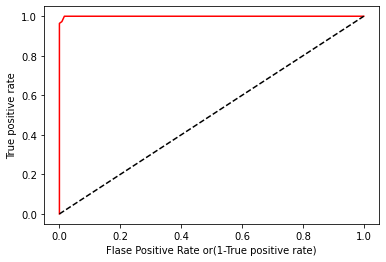

In [93]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_9.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_9 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [94]:
y_pred_test = rf_model_9.predict(X_test)

In [95]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7583333333333333
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       107
           1       0.00      0.00      0.00        13

    accuracy                           0.76       120
   macro avg       0.44      0.43      0.43       120
weighted avg       0.78      0.76      0.77       120

The confusion matrix for testing data is 
 [[91 16]
 [13  0]]


0.4252336448598131


Text(0, 0.5, 'True positive rate')

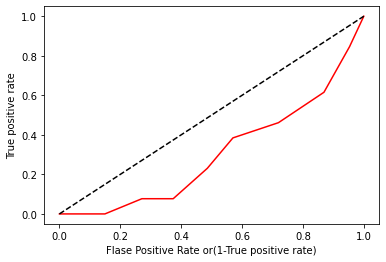

In [96]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_9.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_9 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [97]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'n_jobs':[3,4],'n_estimators':[15,50,150],'criterion':['gini','entropy','log_loss'],'oob_score':[True,False]},
                          cv = 5)        
grid_search.fit(X,y) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [15, 50, 150], 'n_jobs': [3, 4],
                         'oob_score': [True, False]})

In [98]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'n_estimators': 50, 'n_jobs': 3, 'oob_score': True}
0.755


In [99]:
rf_model_10 = RandomForestClassifier(n_jobs = 3,n_estimators = 50, oob_score = True, criterion = "entropy")

In [100]:
rf_model_10.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=3,
                       oob_score=True)

In [101]:
y_pred_train = rf_model_10.predict(X_train)

In [102]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.9979166666666667
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      0.99      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

The confusion matrix for training data is 
 [[369   0]
 [  1 110]]


0.9954954954954955


Text(0, 0.5, 'True positive rate')

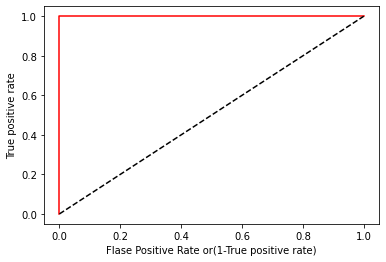

In [103]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_10.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_10 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

In [104]:
y_pred_test = rf_model_10.predict(X_test)

In [105]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.8
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       107
           1       0.00      0.00      0.00        13

    accuracy                           0.80       120
   macro avg       0.44      0.45      0.44       120
weighted avg       0.79      0.80      0.79       120

The confusion matrix for testing data is 
 [[96 11]
 [13  0]]


0.4485981308411215


Text(0, 0.5, 'True positive rate')

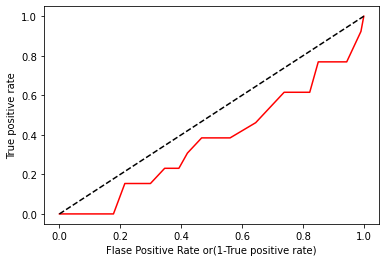

In [106]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_10.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_10 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# rf_model_10 is the better model.

In [108]:
# feature Importance
fe_imp = pd.DataFrame()
fe_imp.insert(loc=0, column='feature', value=list(rf_model_10.feature_names_in_))
fe_imp.insert(loc=1, column='importance', value=list(rf_model_10.feature_importances_))

In [110]:
fe_imp.sort_values('importance',ascending=False)

,feature,importance
2,City.Population,0.524679
3,Work.Experience,0.335413
1,Marital.Status,0.068429
0,Undergrad,0.035877
4,Urban,0.035603


# city population is the very important feature to check for the fraud.